## Example: Applying TigerTail to Birthday Gift Data

In this notebook, we create 2 datasets and use them to demonstrate the use of the classes in the TigerTail library. The first dataset contains the timestamps at which Cassie receives a birthday gift on her birthday, along with a rating from 0-1 of how much she liked the gift. The second dataset contains Cassie's heart rate per minute of her birthday. All of this data is contained within the time range of 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../TT')
from tigertail import TimeFrame, TimeSeries, EventSeries

Here we generate a dataframe with the timestamps at which Cassie receives a gift during her birthday and her rating of each gift. We choose the gift timestamps at random from a date_range of timestamps from 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [2]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')

gift_timestamp = np.random.choice(timestamp, size=100, replace=False)
gift_timestamp

array(['1999-11-18T03:39:00.000000000', '1999-11-18T06:32:00.000000000',
       '1999-11-18T03:29:00.000000000', '1999-11-18T05:18:00.000000000',
       '1999-11-18T15:37:00.000000000', '1999-11-18T22:54:00.000000000',
       '1999-11-18T11:29:00.000000000', '1999-11-18T11:01:00.000000000',
       '1999-11-18T20:29:00.000000000', '1999-11-18T05:40:00.000000000',
       '1999-11-18T09:12:00.000000000', '1999-11-18T12:10:00.000000000',
       '1999-11-18T13:26:00.000000000', '1999-11-18T08:03:00.000000000',
       '1999-11-18T07:33:00.000000000', '1999-11-18T09:42:00.000000000',
       '1999-11-18T14:00:00.000000000', '1999-11-18T12:00:00.000000000',
       '1999-11-18T23:24:00.000000000', '1999-11-18T16:43:00.000000000',
       '1999-11-18T22:02:00.000000000', '1999-11-18T06:46:00.000000000',
       '1999-11-18T11:20:00.000000000', '1999-11-18T21:18:00.000000000',
       '1999-11-18T04:57:00.000000000', '1999-11-18T09:10:00.000000000',
       '1999-11-18T05:31:00.000000000', '1999-11-18

                     gift_rating
1999-11-18 00:11:00     0.676726
1999-11-18 00:23:00     0.452966
1999-11-18 01:00:00     0.384324
1999-11-18 01:04:00     0.524974
1999-11-18 01:14:00     0.618376
...                          ...
1999-11-18 23:03:00     0.164931
1999-11-18 23:24:00     0.457748
1999-11-18 23:40:00     0.726104
1999-11-18 23:49:00     0.115720
1999-11-18 23:58:00     0.044063

[100 rows x 1 columns]


<Axes: title={'center': 'Gifts and their ratings'}>

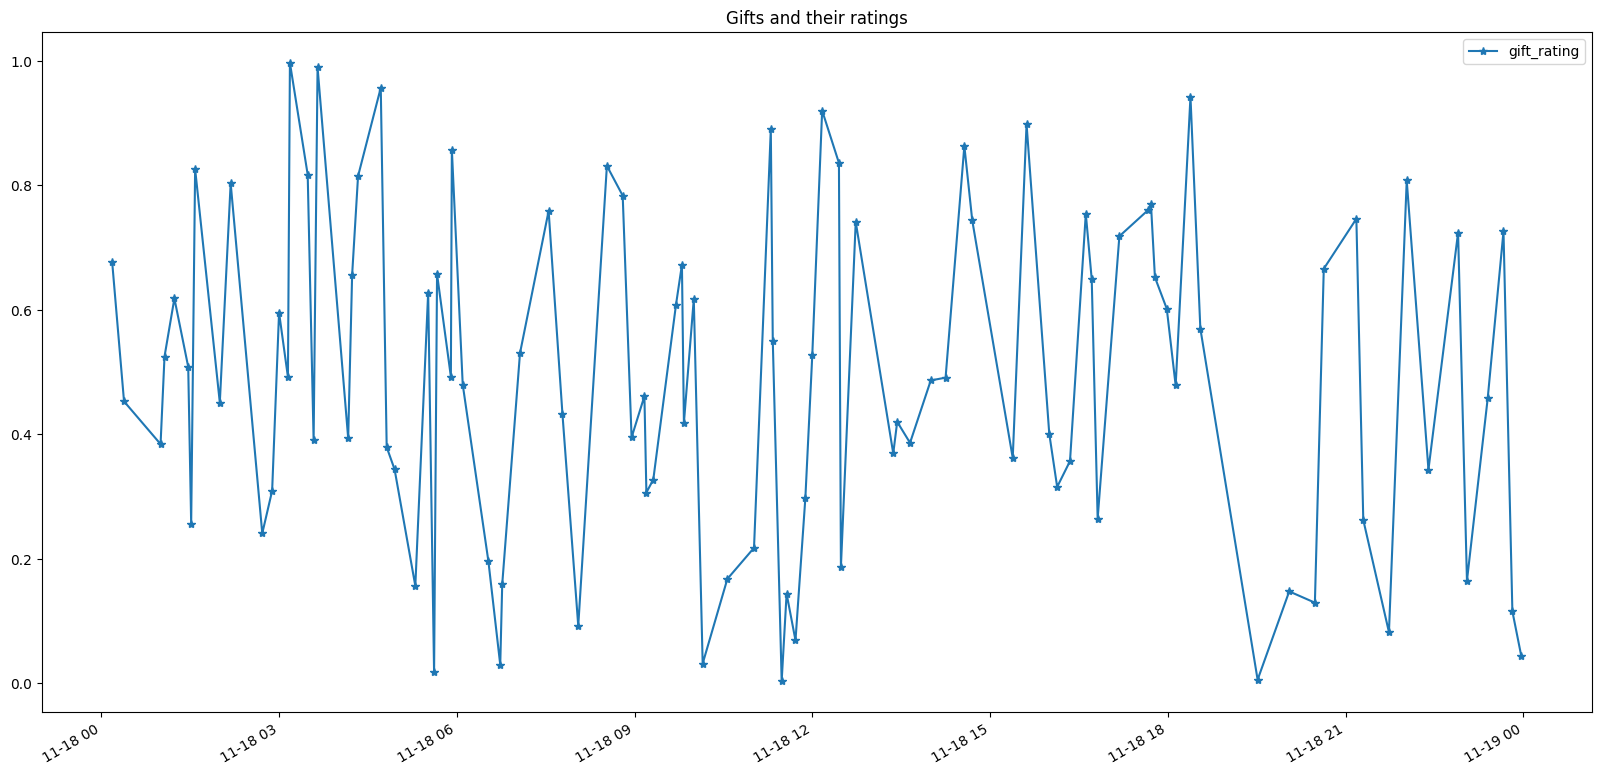

In [3]:
gift_ratings = np.random.random(100)
gift_df = pd.DataFrame({'gift_rating': gift_ratings}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(title='Gifts and their ratings', figsize=(20,10), marker='*')

Now we create an EventSeries object using the birthday gift dataframe. We specify `np.mean` as the default aggregation function.

In [4]:
gift_es = EventSeries(gift_df, agg_func=np.mean)

We demonstrate how to window the gift event series data with 1 hour and 5 minute windows.

In [5]:
# demo the EventSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

window_es_h = gift_es.window('1h')
window_es_h

1999-11-18 00:00:00    0.564846
1999-11-18 01:00:00    0.519829
1999-11-18 02:00:00    0.451173
1999-11-18 03:00:00    0.713648
1999-11-18 04:00:00    0.590792
1999-11-18 05:00:00    0.468267
1999-11-18 06:00:00    0.216276
1999-11-18 07:00:00    0.574016
1999-11-18 08:00:00    0.525572
1999-11-18 09:00:00    0.465826
1999-11-18 10:00:00    0.272272
1999-11-18 11:00:00    0.310394
1999-11-18 12:00:00    0.642419
1999-11-18 13:00:00    0.391932
1999-11-18 14:00:00    0.646176
1999-11-18 15:00:00    0.630332
1999-11-18 16:00:00    0.456948
1999-11-18 17:00:00    0.700433
1999-11-18 18:00:00    0.663660
1999-11-18 19:00:00    0.005790
1999-11-18 20:00:00    0.314438
1999-11-18 21:00:00    0.363702
1999-11-18 22:00:00    0.625112
1999-11-18 23:00:00    0.301713
Freq: h, dtype: float64

<Axes: title={'center': 'Average gift rating for every 1 hr window'}>

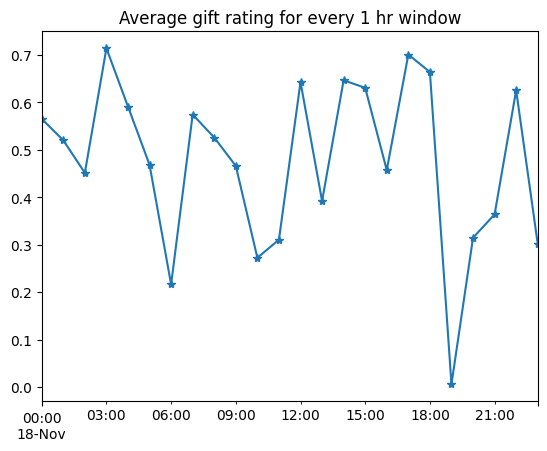

In [6]:
window_es_h.plot(title='Average gift rating for every 1 hr window', marker='*')

In [7]:
window_es_min = gift_es.window('5min')
window_es_min

1999-11-18 00:10:00    0.676726
1999-11-18 00:15:00    0.000000
1999-11-18 00:20:00    0.452966
1999-11-18 00:25:00    0.000000
1999-11-18 00:30:00    0.000000
                         ...   
1999-11-18 23:35:00    0.000000
1999-11-18 23:40:00    0.726104
1999-11-18 23:45:00    0.115720
1999-11-18 23:50:00    0.000000
1999-11-18 23:55:00    0.044063
Freq: 5min, Length: 286, dtype: float64

<Axes: title={'center': 'Average gift rating for every 5 min window'}>

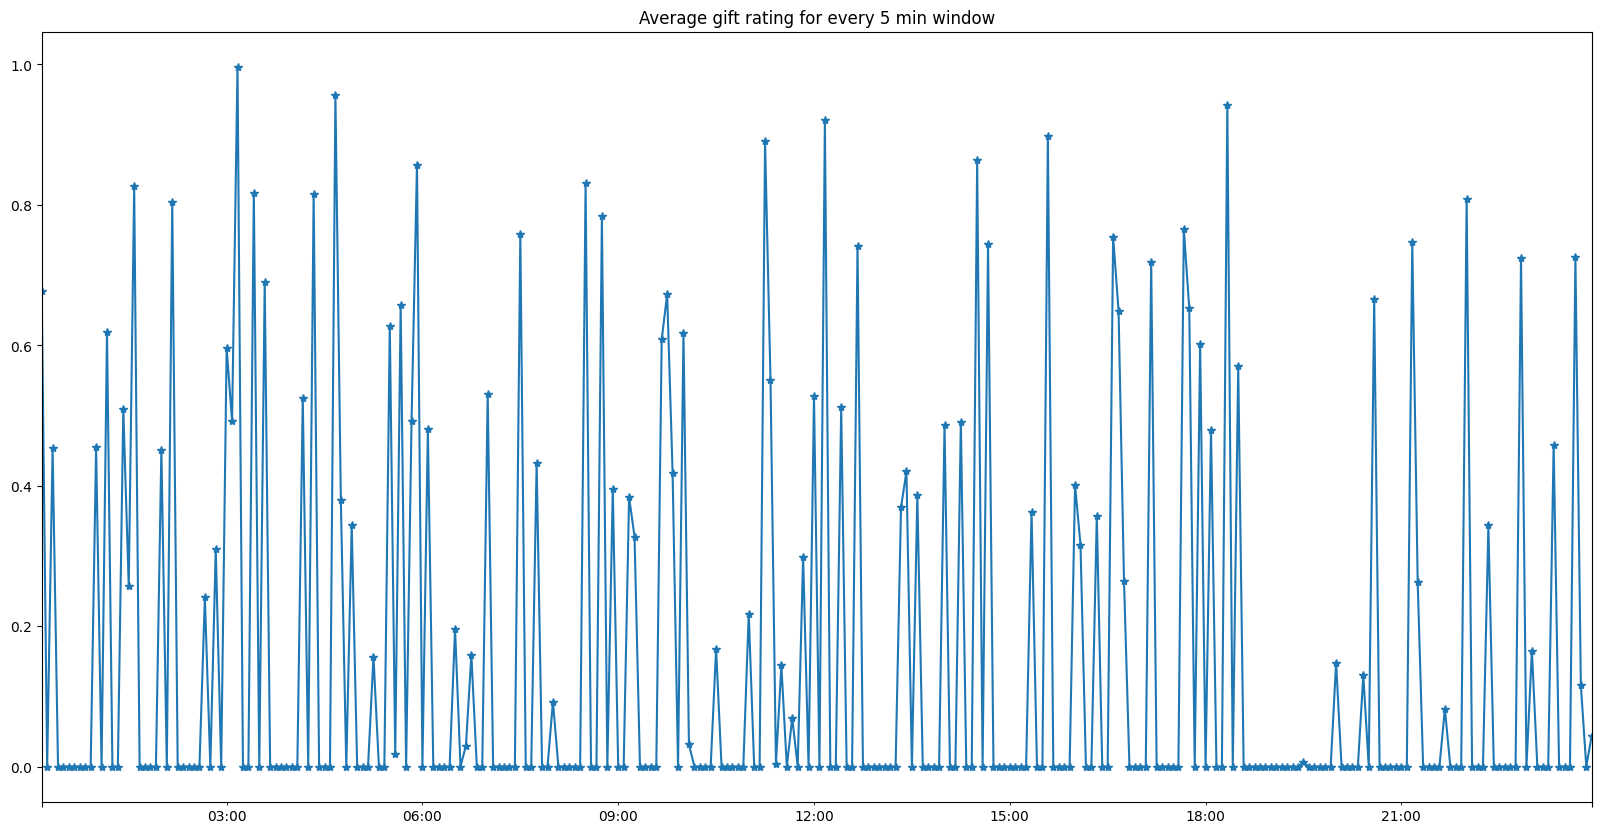

In [8]:
window_es_min.plot(title='Average gift rating for every 5 min window', marker='*', figsize=(20,10))

Now we generate the heart rate per minute dataset. First, we generate random heart rates from 60 to 130 for each minute of the day:

<Axes: title={'center': 'Heart rate per minute'}>

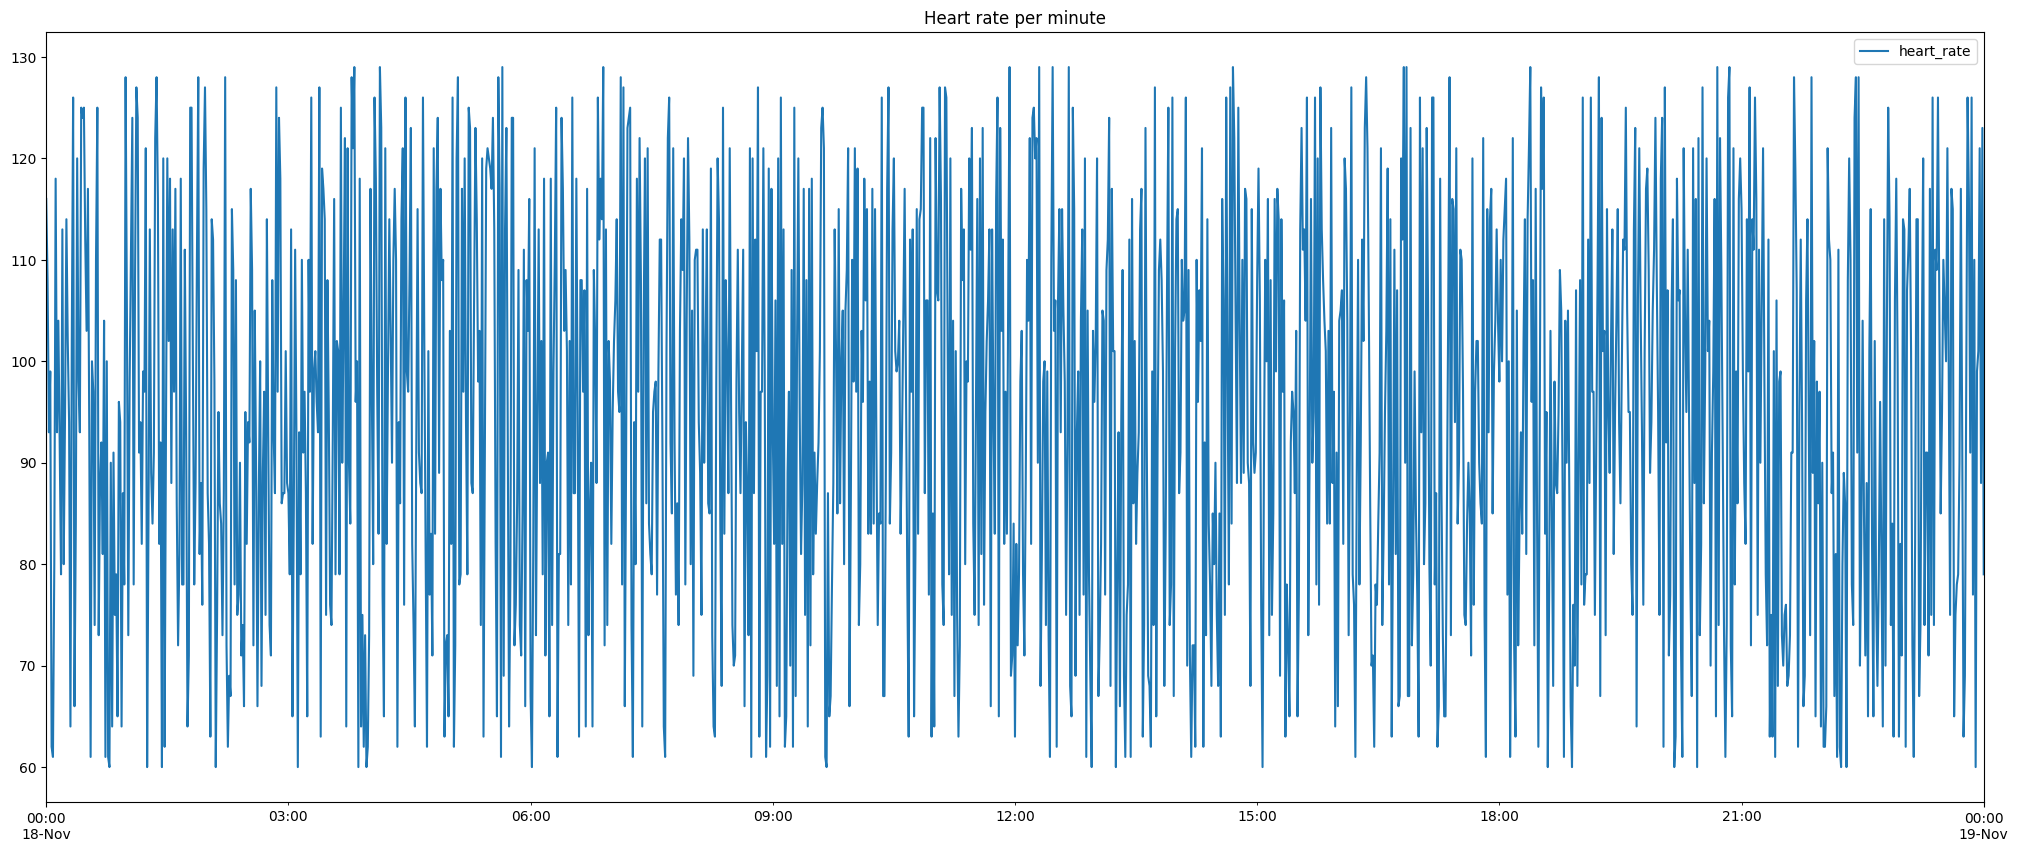

In [9]:
hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(title='Heart rate per minute', linestyle='-', figsize=[25,10])

The code in the following cell adds to the random heart rates generated in the previous cell so that they make more sense in our context, i.e. heart rate increases when the time gets closer to a gift being given.

In [10]:
avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 165,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 159,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 158,
 115,
 125,
 155,
 156,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 157,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 165,
 125,
 155,
 165,
 115,
 125,
 155,
 161,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 162,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 165,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 162,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 161,
 105,
 107,


<Axes: title={'center': 'New heart rate per minute values'}>

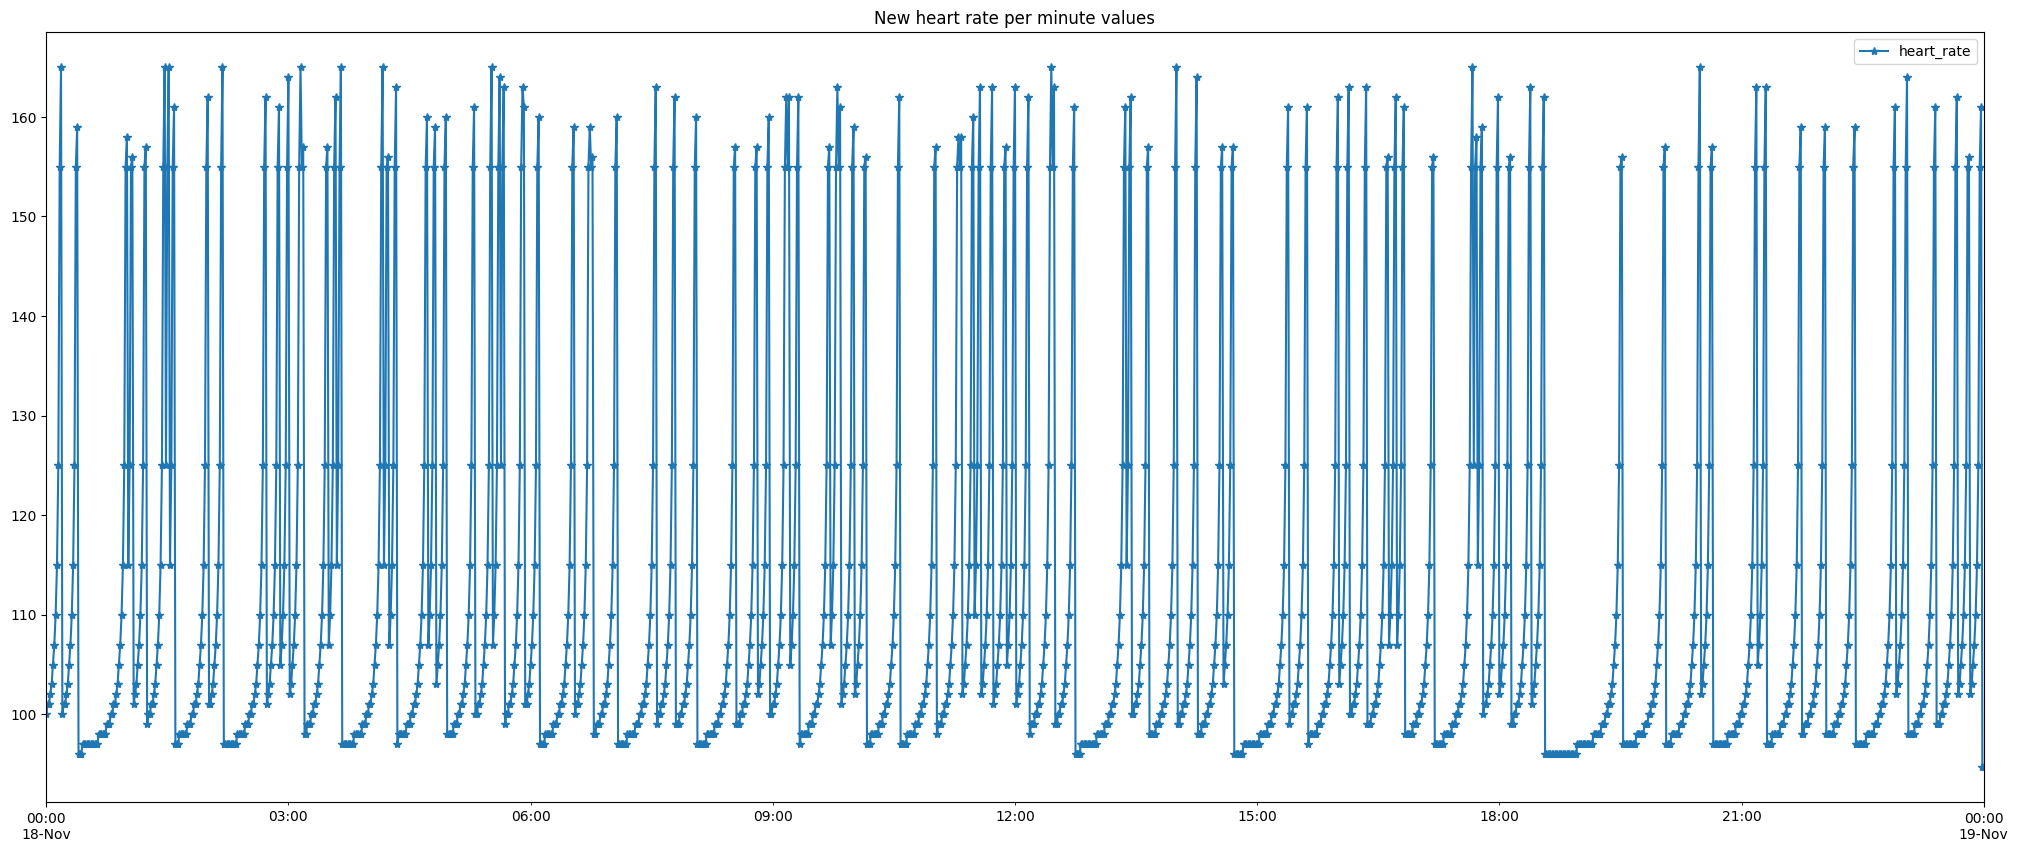

In [11]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(title='New heart rate per minute values', marker='*', figsize=(25,10))

We create a TimeSeries object with the heart rate dataframe and also specify `np.mean` as the aggregation function:

In [12]:
hr_ts = TimeSeries(new_hr_df, agg_func=np.mean)

<Axes: title={'center': 'Average heart rate (bpm) over each hour'}>

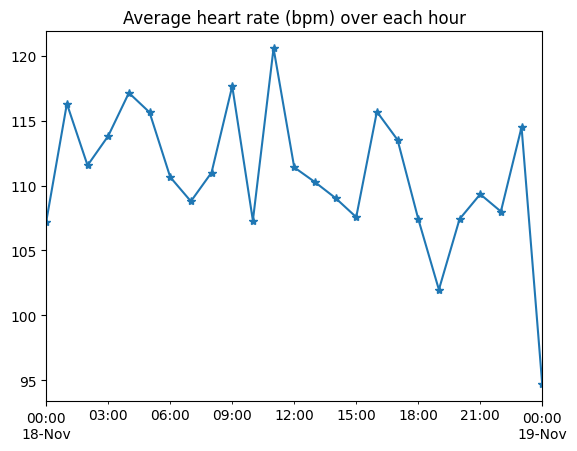

In [13]:
# demo TimeSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

hr_ts.window('1h').plot(title='Average heart rate (bpm) over each hour', marker='*')

<Axes: title={'center': 'Average heart rate (bpm) over each 5 min'}>

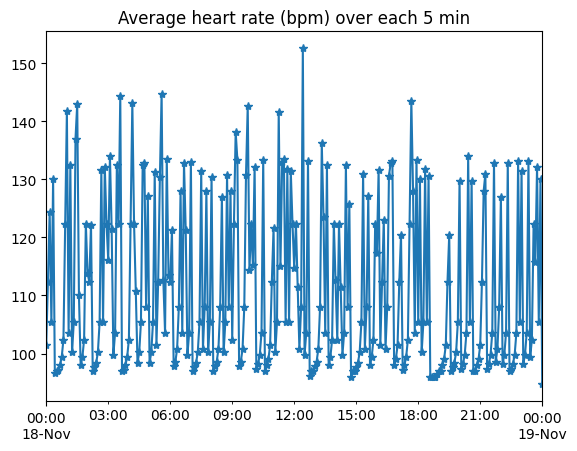

In [14]:
hr_ts.window('5min').plot(title='Average heart rate (bpm) over each 5 min', marker='*')

We then create a TimeFrame object, `tf`, and add the `hr_ts` and `gift_es` objects to it.

In [15]:
tf = TimeFrame()
tf['gift_es'] = gift_es
tf['hr_ts'] = hr_ts

In [16]:
# there's an NaN value for the last timestamp for gift_rating since there are no events 
# at that hour, the last row of the resulting dataframe could be deleted or kept

tf.window('1h')

,gift_rating,heart_rate
1999-11-18 00:00:00,0.564846,107.216667
1999-11-18 01:00:00,0.519829,116.300000
1999-11-18 02:00:00,0.451173,111.550000
1999-11-18 03:00:00,0.713648,113.816667
1999-11-18 04:00:00,0.590792,117.133333
1999-11-18 05:00:00,0.468267,115.633333
1999-11-18 06:00:00,0.216276,110.650000
1999-11-18 07:00:00,0.574016,108.783333
1999-11-18 08:00:00,0.525572,111.000000
1999-11-18 09:00:00,0.465826,117.650000


Then we can make a plot of the aggregated gift events and heart rates windowed according to the frequencies that we specify.

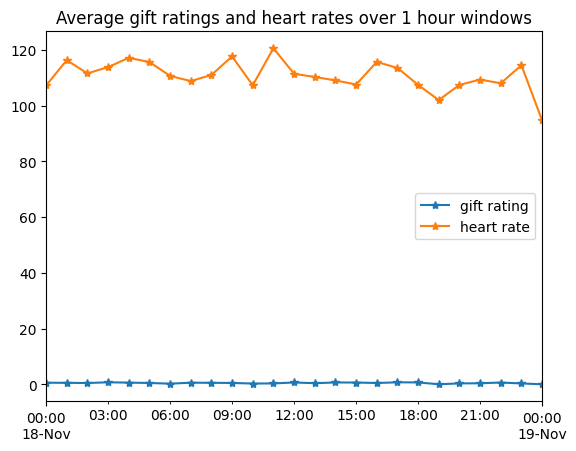

In [17]:
fig, ax = plt.subplots()
tf.window('1h').plot(ax=ax, title='Average gift ratings and heart rates over 1 hour windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

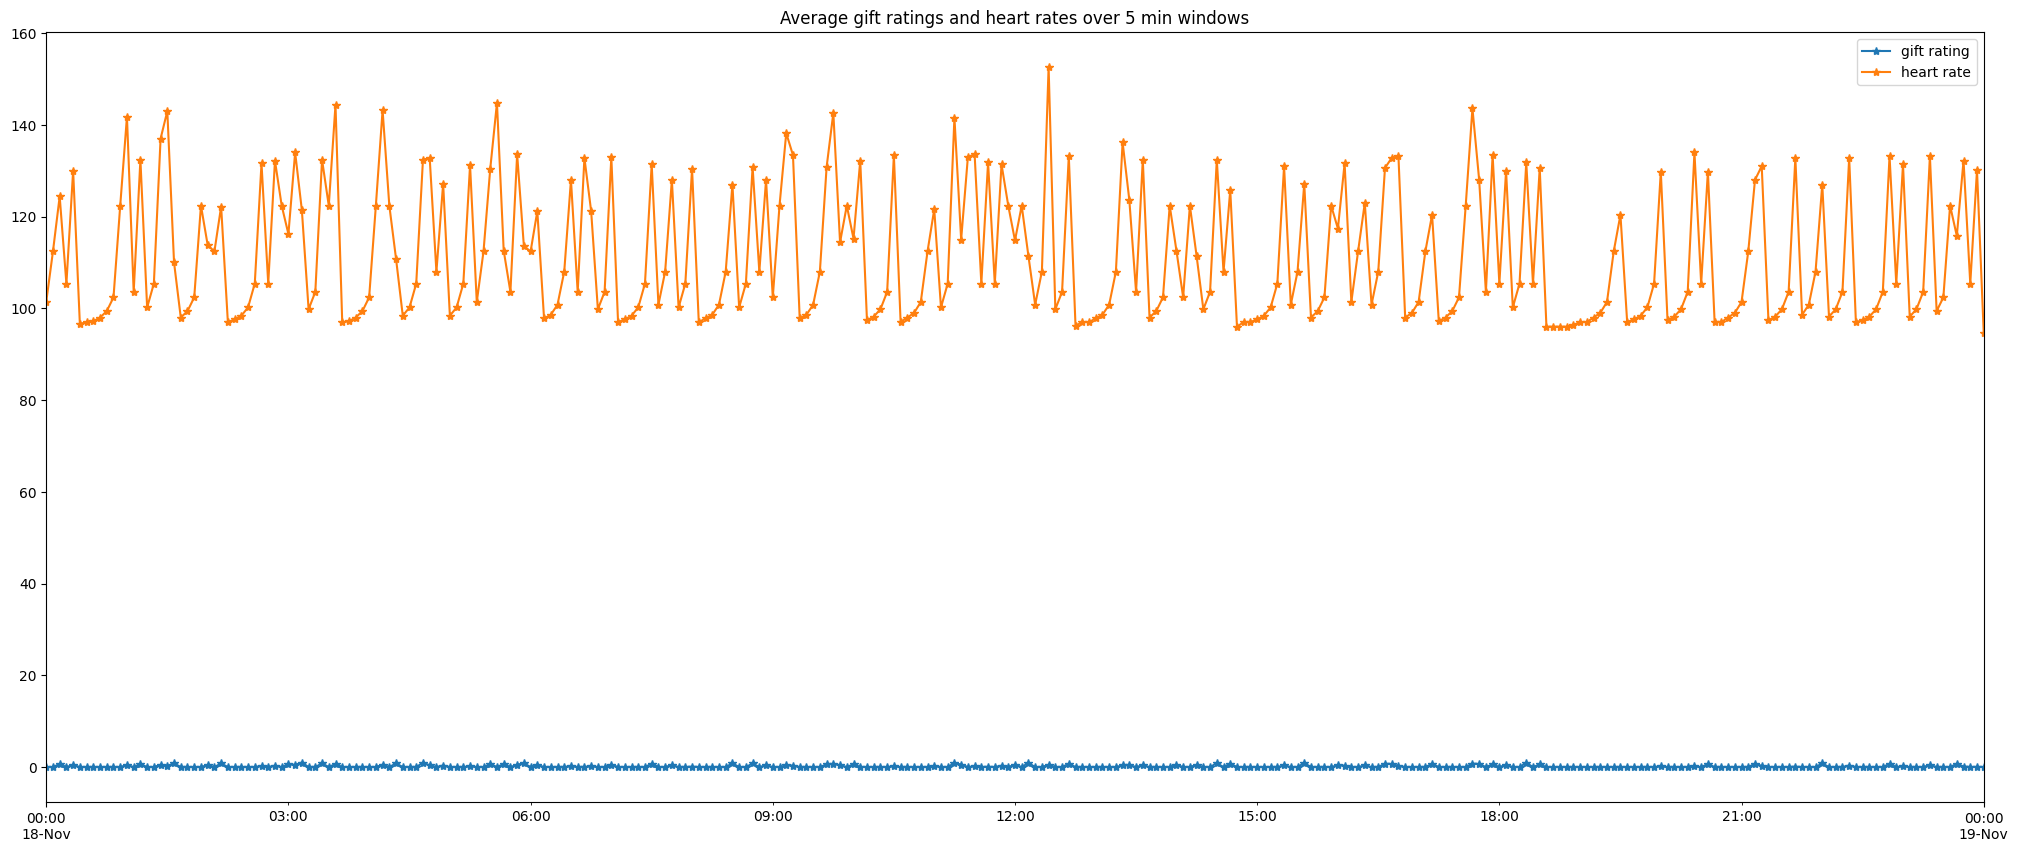

In [18]:
fig, ax = plt.subplots()
tf.window('5min').plot(figsize=(25,10), ax=ax, title='Average gift ratings and heart rates over 5 min windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

Now let's try windowing the heart rate data using the gift event data and the `nonstationary_window` function. First we have to calculate the start and end times of the intervals between events.

In [19]:
gift_es.calc_start_end()
gift_es.ns_window

[(Timestamp('1999-11-18 00:11:00'), Timestamp('1999-11-18 00:23:00')),
 (Timestamp('1999-11-18 00:23:00'), Timestamp('1999-11-18 01:00:00')),
 (Timestamp('1999-11-18 01:00:00'), Timestamp('1999-11-18 01:04:00')),
 (Timestamp('1999-11-18 01:04:00'), Timestamp('1999-11-18 01:14:00')),
 (Timestamp('1999-11-18 01:14:00'), Timestamp('1999-11-18 01:28:00')),
 (Timestamp('1999-11-18 01:28:00'), Timestamp('1999-11-18 01:31:00')),
 (Timestamp('1999-11-18 01:31:00'), Timestamp('1999-11-18 01:35:00')),
 (Timestamp('1999-11-18 01:35:00'), Timestamp('1999-11-18 02:00:00')),
 (Timestamp('1999-11-18 02:00:00'), Timestamp('1999-11-18 02:11:00')),
 (Timestamp('1999-11-18 02:11:00'), Timestamp('1999-11-18 02:43:00')),
 (Timestamp('1999-11-18 02:43:00'), Timestamp('1999-11-18 02:53:00')),
 (Timestamp('1999-11-18 02:53:00'), Timestamp('1999-11-18 03:00:00')),
 (Timestamp('1999-11-18 03:00:00'), Timestamp('1999-11-18 03:09:00')),
 (Timestamp('1999-11-18 03:09:00'), Timestamp('1999-11-18 03:11:00')),
 (Time

Now we window the heart rate time series data using the timestamps of the gift event series data:

In [20]:
ns_window_df = hr_ts.nonstationary_window(gift_es)
ns_window_df

,heart_rate
1999-11-18 00:11:00,115.750000
1999-11-18 00:23:00,115.250000
1999-11-18 01:00:00,103.216216
1999-11-18 01:04:00,137.750000
1999-11-18 01:14:00,118.000000
...,...
1999-11-18 23:03:00,120.666667
1999-11-18 23:24:00,108.190476
1999-11-18 23:40:00,111.437500
1999-11-18 23:49:00,119.777778


Let's visualize the windowed data over time:

<Axes: title={'center': 'Average heart rates in between gift events'}>

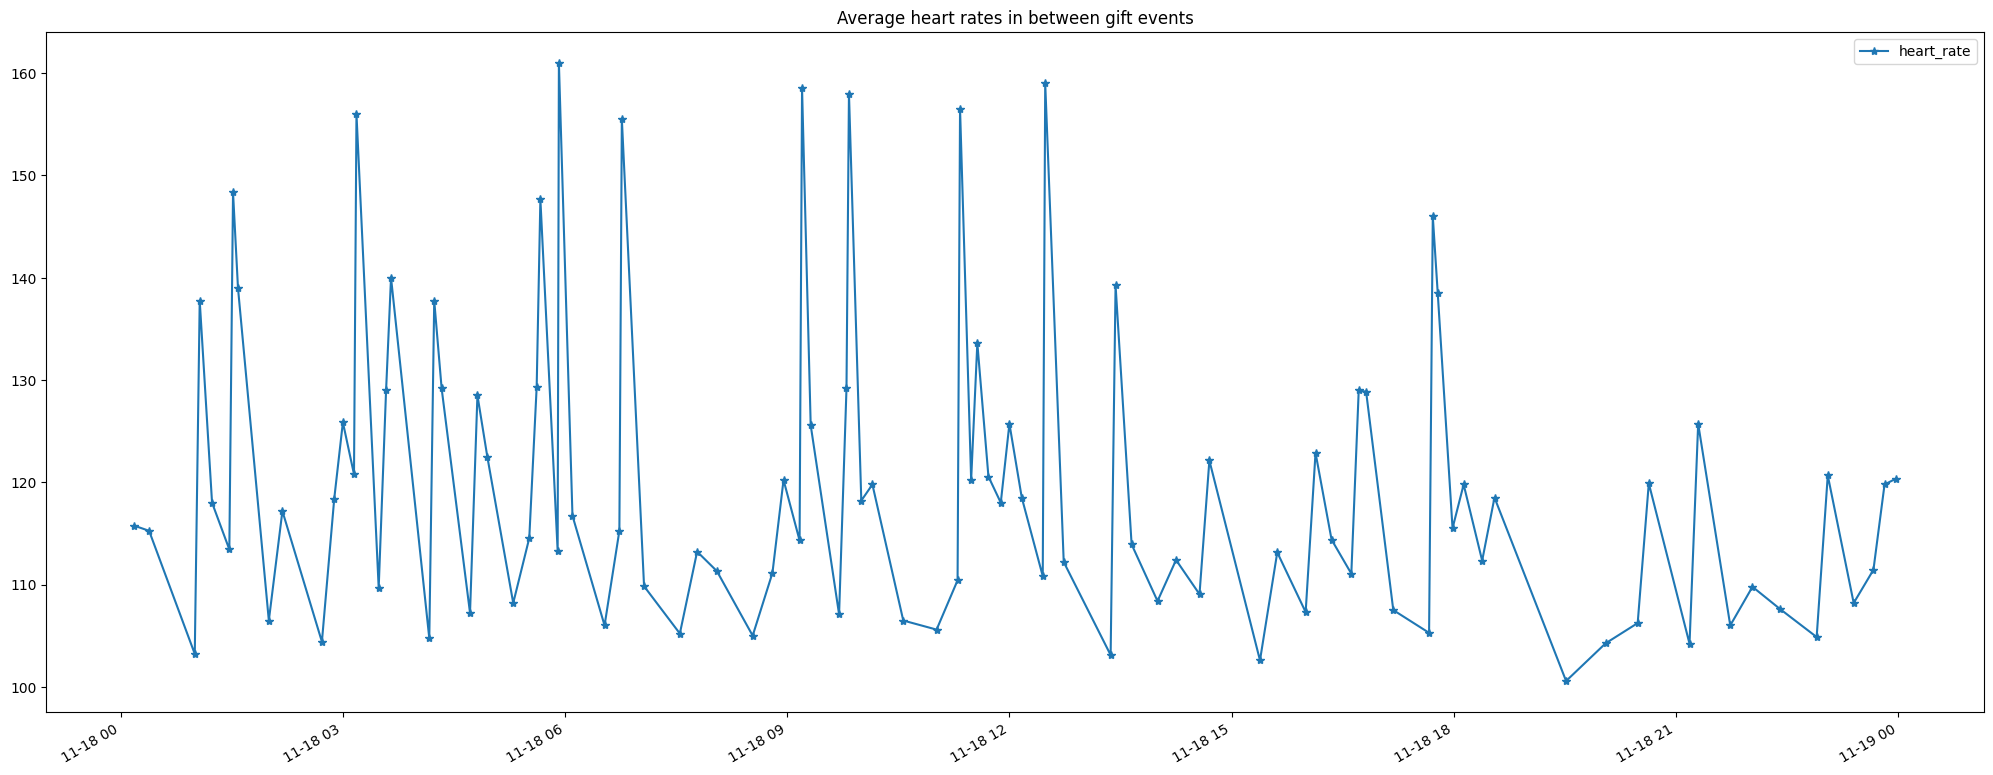

In [21]:
fig, ax = plt.subplots()
# gift_es.data.plot(ax=ax, marker='*')
ns_window_df.plot(figsize=(25,10), ax=ax, title='Average heart rates in between gift events', marker='*')
# ax.legend(['gift rating', 'avg heart rate'])

Now we show how to use the `window` function from `TimeFrame` to do nonstationary windowing of the data. The `window` function in `TimeFrame` calls the `TimeSeries` function `nonstationary_window` that we called manually in the previous demonstration. Notice that we pass in `gift_es` to the `freq` parameter:

In [22]:
ns_window_timeframe = tf.window(freq=gift_es)
ns_window_timeframe

,gift_rating,heart_rate
1999-11-18 00:11:00,0.676726,115.750000
1999-11-18 00:23:00,0.452966,115.250000
1999-11-18 01:00:00,0.384324,103.216216
1999-11-18 01:04:00,0.524974,137.750000
1999-11-18 01:14:00,0.618376,118.000000
...,...,...
1999-11-18 23:03:00,0.164931,120.666667
1999-11-18 23:24:00,0.457748,108.190476
1999-11-18 23:40:00,0.726104,111.437500
1999-11-18 23:49:00,0.115720,119.777778


Now we plot the windowed heart rates against the rating for each gift: 

<Axes: xlabel='gift_rating', ylabel='heart_rate'>

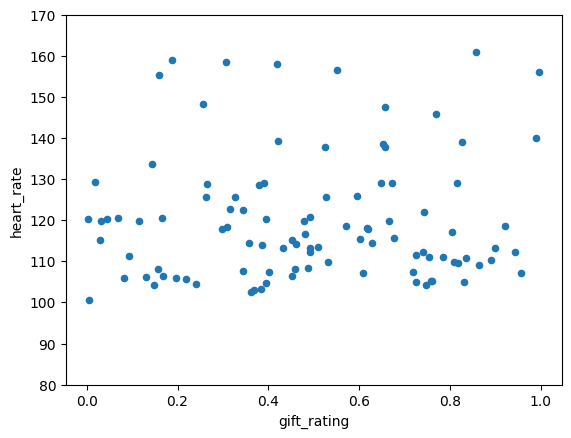

In [23]:
ns_window_timeframe.plot(x='gift_rating', y='heart_rate', kind='scatter', ylim=[80,170])